In [115]:
pip install feature-engine

Note: you may need to restart the kernel to use updated packages.
     ------------------------------------- 319.4/319.4 kB 10.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\jivan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [639]:
#reading the data from the file of year 1999
df_1999_all = pd.read_csv('1999.csv.bz2')

In [640]:
df_2000_all = pd.read_csv('2000.csv.bz2')

In [641]:
#not to add the record which has empty values of arrival and departure Delay
df_1999_all = df_1999_all[~df_1999_all.ArrDelay.isnull() & ~df_1999_all.DepDelay.isnull()]
df_2000_all = df_2000_all[~df_2000_all.ArrDelay.isnull() & ~df_2000_all.DepDelay.isnull()]

In [644]:
df_1999_all.shape

(5360018, 29)

In [366]:
df_2000_all.shape

(5481303, 29)

In [370]:
# take sample 1000 records
df_1999_sample = df_1999_all.sample(1000)
df_2000_sample = df_2000_all.sample(1000)

In [372]:
df_sample = pd.concat([df_1999_sample,df_2000_sample])

In [373]:
df_sample.reset_index(inplace=True)

In [374]:
df_sample.drop(columns=['index'], axis=1,inplace=True)

In [375]:
#adding the Delay column and adding the values in it using require condition
df_sample['Delay'] = df_sample.apply(lambda x: 'N' if x.ArrDelay <= 0 and x.DepDelay <= 0 else 'Y', axis=1)

In [376]:
#getting the data final into new csv file
df_sample.to_csv('sample_1999+2000.csv', index=False)

In [377]:
df = pd.read_csv('sample_1999+2000.csv')

In [638]:
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1999,9,8,3,1835.0,1823,2050.0,2048,AS,281,N937AS,135.0,145.0,117.0,2.0,12.0,LAX,SEA,954,8,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,1999,4,12,1,1632.0,1635,1844.0,1835,DL,76,N173DN,132.0,120.0,96.0,9.0,-3.0,CVG,JFK,589,18,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,1999,12,14,2,829.0,830,1108.0,1104,DL,847,N906DL,159.0,154.0,123.0,4.0,-1.0,EWR,ATL,745,8,28,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,1999,3,18,4,750.0,750,949.0,950,WN,1767,N505,59.0,60.0,49.0,-1.0,0.0,PDX,BOI,344,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
4,1999,8,28,6,808.0,810,902.0,910,DL,1156,N675DL,54.0,60.0,38.0,-8.0,-2.0,ATL,CHS,259,4,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2000,5,19,5,1245.0,1225,1433.0,1435,NW,345,N515US,288.0,310.0,269.0,-2.0,20.0,DTW,SFO,2079,4,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1996,2000,5,9,2,1427.0,1425,1642.0,1634,UA,918,N529UA,135.0,129.0,111.0,8.0,2.0,MCO,IAD,758,7,17,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1997,2000,10,9,1,918.0,920,1042.0,1040,NW,707,N986US,144.0,140.0,114.0,2.0,-2.0,MSP,GTF,887,5,25,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1998,2000,11,8,3,1238.0,1233,1345.0,1350,AA,1057,NR33AA,67.0,77.0,42.0,-5.0,5.0,LAS,LAX,236,10,15,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y


In [657]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               2000 non-null   int64  
 1   Month              2000 non-null   int64  
 2   DayofMonth         2000 non-null   int64  
 3   DayOfWeek          2000 non-null   int64  
 4   DepTime            2000 non-null   float64
 5   CRSDepTime         2000 non-null   float64
 6   ArrTime            2000 non-null   float64
 7   CRSArrTime         2000 non-null   float64
 8   UniqueCarrier      2000 non-null   object 
 9   FlightNum          2000 non-null   int64  
 10  TailNum            2000 non-null   object 
 11  ActualElapsedTime  2000 non-null   float64
 12  CRSElapsedTime     2000 non-null   float64
 13  AirTime            2000 non-null   float64
 14  ArrDelay           2000 non-null   float64
 15  DepDelay           2000 non-null   float64
 16  Origin             2000 

In [658]:
df_sample.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,1999,9,8,3,1835.0,18.383333,20.833333,20.800000,AS,281,N937AS,135.0,145.0,117.0,2.0,12.0,LAX,SEA,954,8,10,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
1,1999,4,12,1,1632.0,16.583333,18.733333,18.583333,DL,76,N173DN,132.0,120.0,96.0,9.0,-3.0,CVG,JFK,589,18,18,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
2,1999,12,14,2,829.0,8.500000,11.133333,11.066667,DL,847,N906DL,159.0,154.0,123.0,4.0,-1.0,EWR,ATL,745,8,28,0,NaN,0,NaN,NaN,NaN,NaN,NaN,Y
3,1999,3,18,4,750.0,7.833333,9.816667,9.833333,WN,1767,N505,59.0,60.0,49.0,-1.0,0.0,PDX,BOI,344,2,8,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N
4,1999,8,28,6,808.0,8.166667,9.033333,9.166667,DL,1156,N675DL,54.0,60.0,38.0,-8.0,-2.0,ATL,CHS,259,4,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN,N


In [659]:
def convert_hhmm_m(df, columns_list: list):
    '''This function converts time in hhmm to mm : hh * 60 + mm
    Input: df -> pandas data frame
    columns_list: list of columns to be converted
    '''

    for column in columns_list:
        df.loc[:,column] = ((df.loc[:,column]//100)*60 + (df.loc[:,column]%100)).div(60)


In [660]:
columns_list = ['CRSDepTime', 'CRSArrTime', 'ArrTime']
convert_hhmm_m(df= df_sample, columns_list=columns_list)

In [661]:
from feature_engine.creation import CyclicalFeatures
columns_list1 = ['Month', 'DayofMonth','DayOfWeek'] 
cf = CyclicalFeatures(variables=columns_list+columns_list1, drop_original=True)
time_features = df_sample[columns_list+columns_list1]
df_t = cf.fit_transform(time_features)

In [662]:
df_t.head()

,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos,ArrTime_sin,ArrTime_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos
0,-0.994628,0.103515,-0.740607,0.671938,-0.737277,0.675590,-1.000000e+00,-1.836970e-16,0.998717,-0.050649,0.433884,-0.900969
1,-0.933097,-0.359624,-0.987842,0.155464,-0.981627,0.190809,8.660254e-01,-5.000000e-01,0.651372,-0.758758,0.781831,0.623490
2,0.792411,-0.609988,0.239968,-0.970781,0.224951,-0.974370,-2.449294e-16,1.000000e+00,0.299363,-0.954139,0.974928,-0.222521
3,0.886352,-0.463012,0.535790,-0.844351,0.540974,-0.841039,1.000000e+00,6.123234e-17,-0.485302,-0.874347,-0.433884,-0.900969
4,0.842592,-0.538552,0.674360,-0.738403,0.700909,-0.713250,-8.660254e-01,-5.000000e-01,-0.571268,0.820763,-0.781831,0.623490


In [663]:
import matplotlib.pyplot as plt

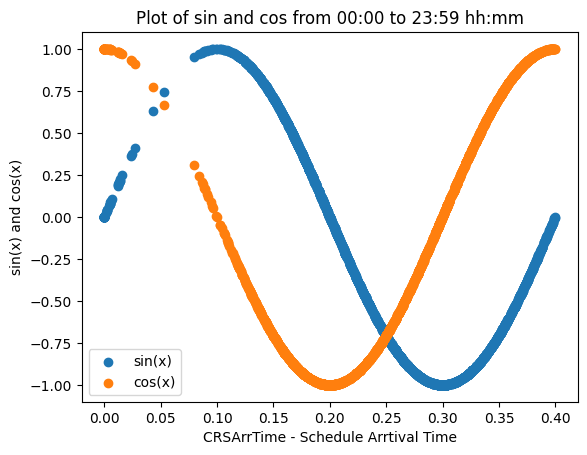

In [664]:
plt.scatter(df_sample['CRSArrTime'], df_t['CRSArrTime_sin'])
plt.scatter(df_sample['CRSArrTime'], df_t['CRSArrTime_cos'])
plt.xlabel('CRSArrTime - Schedule Arrtival Time')  # string must be enclosed with quotes '  '
plt.ylabel('sin(x) and cos(x)')
plt.title('Plot of sin and cos from 00:00 to 23:59 hh:mm')
plt.legend(['sin(x)', 'cos(x)']) 
plt.show()

In [665]:
df_final = pd.concat([df_sample,df_t],axis=1)

In [667]:
df_final = df_final.drop(columns=['Month', 'DayofMonth','DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'ArrTime',
                                  'Cancelled', 'FlightNum', 'TailNum', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                                'SecurityDelay', 'LateAircraftDelay'])

In [668]:
df_final.columns

Index(['Year', 'DepTime', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Delay', 'CRSDepTime_sin',
       'CRSDepTime_cos', 'CRSArrTime_sin', 'CRSArrTime_cos', 'ArrTime_sin',
       'ArrTime_cos', 'Month_sin', 'Month_cos', 'DayofMonth_sin',
       'DayofMonth_cos', 'DayOfWeek_sin', 'DayOfWeek_cos'],
      dtype='object')

In [669]:
df_final.to_csv('sample_1999+2000_time.csv',index=False)

In [670]:
df_final.shape

(2000, 26)

In [671]:
df_final.head()

,Year,DepTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Delay,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos,ArrTime_sin,ArrTime_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos
0,1999,1835.0,AS,135.0,145.0,117.0,2.0,12.0,LAX,SEA,954,8,10,Y,-0.994628,0.103515,-0.740607,0.671938,-0.737277,0.675590,-1.000000e+00,-1.836970e-16,0.998717,-0.050649,0.433884,-0.900969
1,1999,1632.0,DL,132.0,120.0,96.0,9.0,-3.0,CVG,JFK,589,18,18,Y,-0.933097,-0.359624,-0.987842,0.155464,-0.981627,0.190809,8.660254e-01,-5.000000e-01,0.651372,-0.758758,0.781831,0.623490
2,1999,829.0,DL,159.0,154.0,123.0,4.0,-1.0,EWR,ATL,745,8,28,Y,0.792411,-0.609988,0.239968,-0.970781,0.224951,-0.974370,-2.449294e-16,1.000000e+00,0.299363,-0.954139,0.974928,-0.222521
3,1999,750.0,WN,59.0,60.0,49.0,-1.0,0.0,PDX,BOI,344,2,8,N,0.886352,-0.463012,0.535790,-0.844351,0.540974,-0.841039,1.000000e+00,6.123234e-17,-0.485302,-0.874347,-0.433884,-0.900969
4,1999,808.0,DL,54.0,60.0,38.0,-8.0,-2.0,ATL,CHS,259,4,12,N,0.842592,-0.538552,0.674360,-0.738403,0.700909,-0.713250,-8.660254e-01,-5.000000e-01,-0.571268,0.820763,-0.781831,0.623490


In [672]:
# FlightNum 
# TailNum


In [673]:
df_test = pd.read_excel('Airlines flights to be classified unlabelled (2).xlsx')

In [674]:
df_test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed (Y or N)
0,NaN,1,30,6,NaN,1920,2016,2030,US,1541,N275AU,NaN,70,42.0,-14,NaN,ROC,PHL,257,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,6,6,NaN,728,957,944,TW,606,N921L,NaN,76,53.0,13,NaN,STL,TYS,405,4.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,17,3,NaN,0,1330,0,UA,1660,N951UA,NaN,205,182.0,-10,NaN,DEN,PHL,1557,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,24,6,NaN,700,920,940,UA,462,N998UA,NaN,100,74.0,-20,NaN,ORD,CLT,599,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,1,7,NaN,1205,1306,1312,TW,447,NaN,NaN,127,NaN,-6,NaN,ORF,STL,784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,6,7,2,NaN,945,1044,1048,US,253,NaN,NaN,63,NaN,-4,NaN,PIT,LEX,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,14,4,NaN,1455,1730,1714,CO,1098,NaN,NaN,139,NaN,16,NaN,IAH,ORD,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,8,22,1,NaN,1750,1938,1942,DL,922,NaN,NaN,112,NaN,-4,NaN,CVG,LGA,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,9,12,3,NaN,1500,1602,1605,OO,3691,N565SW,NaN,65,52.0,-3,NaN,SUN,SLC,223,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,10,14,7,NaN,1500,1715,1710,MQ,4471,N820AE,NaN,130,109.0,5,NaN,ORD,PNS,794,3.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [675]:
# ActualElapsedTime  = AirTime + TaxiIn + TaxiOut 
df_test['ActualElapsedTime'] = df_test['AirTime'] + df_test['TaxiIn'] + df_test['TaxiOut']

In [676]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               0 non-null      float64
 1   Month              12 non-null     int64  
 2   DayofMonth         12 non-null     int64  
 3   DayOfWeek          12 non-null     int64  
 4   DepTime            0 non-null      float64
 5   CRSDepTime         12 non-null     int64  
 6   ArrTime            12 non-null     int64  
 7   CRSArrTime         12 non-null     int64  
 8   UniqueCarrier      12 non-null     object 
 9   FlightNum          12 non-null     int64  
 10  TailNum            8 non-null      object 
 11  ActualElapsedTime  8 non-null      float64
 12  CRSElapsedTime     12 non-null     int64  
 13  AirTime            8 non-null      float64
 14  ArrDelay           12 non-null     int64  
 15  DepDelay           0 non-null      float64
 16  Origin             12 non-nu

In [677]:
df_test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed (Y or N)
0,NaN,1,30,6,NaN,1920,2016,2030,US,1541,N275AU,63.0,70,42.0,-14,NaN,ROC,PHL,257,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,6,6,NaN,728,957,944,TW,606,N921L,76.0,76,53.0,13,NaN,STL,TYS,405,4.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,17,3,NaN,0,1330,0,UA,1660,N951UA,198.0,205,182.0,-10,NaN,DEN,PHL,1557,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,24,6,NaN,700,920,940,UA,462,N998UA,84.0,100,74.0,-20,NaN,ORD,CLT,599,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,1,7,NaN,1205,1306,1312,TW,447,NaN,NaN,127,NaN,-6,NaN,ORF,STL,784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,6,7,2,NaN,945,1044,1048,US,253,NaN,NaN,63,NaN,-4,NaN,PIT,LEX,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,14,4,NaN,1455,1730,1714,CO,1098,NaN,NaN,139,NaN,16,NaN,IAH,ORD,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,8,22,1,NaN,1750,1938,1942,DL,922,NaN,NaN,112,NaN,-4,NaN,CVG,LGA,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,9,12,3,NaN,1500,1602,1605,OO,3691,N565SW,64.0,65,52.0,-3,NaN,SUN,SLC,223,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,10,14,7,NaN,1500,1715,1710,MQ,4471,N820AE,130.0,130,109.0,5,NaN,ORD,PNS,794,3.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
# ArrDelay = ArrTime - CRSArrTime
df_test.loc[2,'CRSArrTime'] = df_test.loc[2,'ArrTime'] - df_test.loc[2,'ArrDelay']

In [679]:
# CRSElapsedTime = CRSArrTime - CRSDepTime
CRSArrTime = 820 # 13*60+40 (13hh:40mm)
CRSElapsedTime = 205
diff = CRSArrTime - CRSElapsedTime # 615
diff = (diff//60)*100 + diff%60
df_test.loc[2,'CRSDepTime'] = diff

In [680]:
df_test

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delayed (Y or N)
0,NaN,1,30,6,NaN,1920,2016,2030,US,1541,N275AU,63.0,70,42.0,-14,NaN,ROC,PHL,257,8.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,6,6,NaN,728,957,944,TW,606,N921L,76.0,76,53.0,13,NaN,STL,TYS,405,4.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,17,3,NaN,1015,1330,1340,UA,1660,N951UA,198.0,205,182.0,-10,NaN,DEN,PHL,1557,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,24,6,NaN,700,920,940,UA,462,N998UA,84.0,100,74.0,-20,NaN,ORD,CLT,599,2.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,1,7,NaN,1205,1306,1312,TW,447,NaN,NaN,127,NaN,-6,NaN,ORF,STL,784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,6,7,2,NaN,945,1044,1048,US,253,NaN,NaN,63,NaN,-4,NaN,PIT,LEX,289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,7,14,4,NaN,1455,1730,1714,CO,1098,NaN,NaN,139,NaN,16,NaN,IAH,ORD,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,8,22,1,NaN,1750,1938,1942,DL,922,NaN,NaN,112,NaN,-4,NaN,CVG,LGA,585,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,9,12,3,NaN,1500,1602,1605,OO,3691,N565SW,64.0,65,52.0,-3,NaN,SUN,SLC,223,4.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,10,14,7,NaN,1500,1715,1710,MQ,4471,N820AE,130.0,130,109.0,5,NaN,ORD,PNS,794,3.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [681]:
columns_list = ['CRSDepTime', 'CRSArrTime', 'ArrTime']
convert_hhmm_m(df= df_test, columns_list=columns_list)

In [682]:
columns_list1 = ['Month', 'DayofMonth','DayOfWeek'] 
featues_changes = df_test[columns_list+columns_list1]
df_trans_test = cf.transform(featues_changes)

In [683]:
df_trans_test

,CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos,ArrTime_sin,ArrTime_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos
0,0.742073,-0.670320,0.975067,-0.221913,-0.866025,-5.000000e-01,5.000000e-01,8.660254e-01,-0.201299,0.979530,-7.818315e-01,0.623490
1,-0.903858,-0.427833,0.808118,-0.589021,-0.707107,7.071068e-01,8.660254e-01,5.000000e-01,0.937752,0.347305,-7.818315e-01,0.623490
2,-0.781637,-0.623734,0.930722,0.365728,-1.000000,-1.714815e-14,1.000000e+00,6.123234e-17,-0.299363,-0.954139,4.338837e-01,-0.900969
3,-0.076337,-0.997082,0.913871,0.406005,0.866025,-5.000000e-01,8.660254e-01,-5.000000e-01,-0.988468,0.151428,-7.818315e-01,0.623490
4,0.991575,0.129534,0.143592,0.989637,-1.000000,-2.400865e-14,5.000000e-01,-8.660254e-01,0.201299,0.979530,-2.449294e-16,1.000000
5,0.627990,-0.778221,0.117619,0.993059,-0.866025,5.000000e-01,1.224647e-16,-1.000000e+00,0.988468,0.151428,9.749279e-01,-0.222521
6,0.911192,-0.411982,0.653134,0.757242,-1.000000,-3.380830e-14,-5.000000e-01,-8.660254e-01,0.299363,-0.954139,-4.338837e-01,-0.900969
7,-0.658080,-0.752948,0.976967,-0.213389,0.500000,8.660254e-01,-8.660254e-01,-5.000000e-01,-0.968077,-0.250653,7.818315e-01,0.623490
8,-0.163008,-0.986625,0.996284,0.086129,0.500000,8.660254e-01,-1.000000e+00,-1.836970e-16,0.651372,-0.758758,4.338837e-01,-0.900969
9,-0.163008,-0.986625,-0.329911,0.944012,0.707107,7.071068e-01,-8.660254e-01,5.000000e-01,0.299363,-0.954139,-2.449294e-16,1.000000


In [684]:
df_test_final = pd.concat([df_test,df_trans_test],axis=1)
df_test_final = df_test_final.drop(columns=['Month', 'DayofMonth','DayOfWeek', 'CRSDepTime', 'CRSArrTime', 'ArrTime',
                                  'Cancelled', 'FlightNum', 'TailNum', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
                                'SecurityDelay', 'LateAircraftDelay'])

In [685]:
df_test_final.shape

(12, 26)

In [686]:
df_test_final.columns

Index(['Year', 'DepTime', 'UniqueCarrier', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'Delayed (Y or N)', 'CRSDepTime_sin',
       'CRSDepTime_cos', 'CRSArrTime_sin', 'CRSArrTime_cos', 'ArrTime_sin',
       'ArrTime_cos', 'Month_sin', 'Month_cos', 'DayofMonth_sin',
       'DayofMonth_cos', 'DayOfWeek_sin', 'DayOfWeek_cos'],
      dtype='object')

In [687]:
df_test_final.to_csv('sample_12_records.csv',index=False)

In [688]:
df_test_final

,Year,DepTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Delayed (Y or N),CRSDepTime_sin,CRSDepTime_cos,CRSArrTime_sin,CRSArrTime_cos,ArrTime_sin,ArrTime_cos,Month_sin,Month_cos,DayofMonth_sin,DayofMonth_cos,DayOfWeek_sin,DayOfWeek_cos
0,NaN,NaN,US,63.0,70,42.0,-14,NaN,ROC,PHL,257,8.0,13.0,NaN,0.742073,-0.670320,0.975067,-0.221913,-0.866025,-5.000000e-01,5.000000e-01,8.660254e-01,-0.201299,0.979530,-7.818315e-01,0.623490
1,NaN,NaN,TW,76.0,76,53.0,13,NaN,STL,TYS,405,4.0,19.0,NaN,-0.903858,-0.427833,0.808118,-0.589021,-0.707107,7.071068e-01,8.660254e-01,5.000000e-01,0.937752,0.347305,-7.818315e-01,0.623490
2,NaN,NaN,UA,198.0,205,182.0,-10,NaN,DEN,PHL,1557,3.0,13.0,NaN,-0.781637,-0.623734,0.930722,0.365728,-1.000000,-1.714815e-14,1.000000e+00,6.123234e-17,-0.299363,-0.954139,4.338837e-01,-0.900969
3,NaN,NaN,UA,84.0,100,74.0,-20,NaN,ORD,CLT,599,2.0,8.0,NaN,-0.076337,-0.997082,0.913871,0.406005,0.866025,-5.000000e-01,8.660254e-01,-5.000000e-01,-0.988468,0.151428,-7.818315e-01,0.623490
4,NaN,NaN,TW,NaN,127,NaN,-6,NaN,ORF,STL,784,NaN,NaN,NaN,0.991575,0.129534,0.143592,0.989637,-1.000000,-2.400865e-14,5.000000e-01,-8.660254e-01,0.201299,0.979530,-2.449294e-16,1.000000
5,NaN,NaN,US,NaN,63,NaN,-4,NaN,PIT,LEX,289,NaN,NaN,NaN,0.627990,-0.778221,0.117619,0.993059,-0.866025,5.000000e-01,1.224647e-16,-1.000000e+00,0.988468,0.151428,9.749279e-01,-0.222521
6,NaN,NaN,CO,NaN,139,NaN,16,NaN,IAH,ORD,925,NaN,NaN,NaN,0.911192,-0.411982,0.653134,0.757242,-1.000000,-3.380830e-14,-5.000000e-01,-8.660254e-01,0.299363,-0.954139,-4.338837e-01,-0.900969
7,NaN,NaN,DL,NaN,112,NaN,-4,NaN,CVG,LGA,585,NaN,NaN,NaN,-0.658080,-0.752948,0.976967,-0.213389,0.500000,8.660254e-01,-8.660254e-01,-5.000000e-01,-0.968077,-0.250653,7.818315e-01,0.623490
8,NaN,NaN,OO,64.0,65,52.0,-3,NaN,SUN,SLC,223,4.0,8.0,NaN,-0.163008,-0.986625,0.996284,0.086129,0.500000,8.660254e-01,-1.000000e+00,-1.836970e-16,0.651372,-0.758758,4.338837e-01,-0.900969
9,NaN,NaN,MQ,130.0,130,109.0,5,NaN,ORD,PNS,794,3.0,18.0,NaN,-0.163008,-0.986625,-0.329911,0.944012,0.707107,7.071068e-01,-8.660254e-01,5.000000e-01,0.299363,-0.954139,-2.449294e-16,1.000000
